## Demo vẽ bản đồ - đồ án môn cơ sở trí tuệ nhân tạo - ĐH KHTN TPHCM
Trợ giảng: 
- Nguyễn Khánh Toàn - ktoan271199@gmail.com
- Lê Minh Nhật - minhnhatvt2@gmail.com

## Chuẩn bị file input

In [13]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        x\n')
    outfile.write('x     x     xxxxxxxxxx\n')
    outfile.write('x x   +xx  xxxx xxx xx\n')
    outfile.write('  x   x x xx   xxxx  x\n')
    outfile.write('x          xx +xx  x x\n')
    outfile.write('xxxxxxx x      xx  x x\n')
    outfile.write('xxxxxxxxx  x x  xx   x\n')
    outfile.write('x          x x Sx x  x\n')
    outfile.write('xxxxx x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

## Các hàm bổ trợ

In [14]:
import os
import math
import matplotlib.pyplot as plt

In [15]:
def visualize_maze(matrix, bonus, start, end, route=None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']
    
    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=100).add_subplot(111)

    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')

    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='silver')

    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print(f'Starting point (x, y) = {start[0], start[1]}')
    print(f'Ending point (x, y) = {end[0], end[1]}')
    
    for _, point in enumerate(bonus):
        print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')


In [16]:
def read_file(file_name: str = 'maze.txt'):
    f=open(file_name,'r')
    n_bonus_points = int(next(f)[:-1])
    bonus_points = []
    for i in range(n_bonus_points):
        x, y, reward = map(int, next(f)[:-1].split(' '))
        bonus_points.append((x, y, reward))

    text=f.read()
    matrix=[list(i) for i in text.splitlines()]
    f.close()

    return bonus_points, matrix

## Đọc file và vẽ bản đồ

In [17]:
bonus_points, matrix = read_file('maze_map.txt')

In [18]:
print(f'The height of the matrix: {len(matrix)}')
print(f'The width of the matrix: {len(matrix[0])}')

The height of the matrix: 11
The width of the matrix: 22


In [19]:
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i][j]=='S':
            start=(i,j)

        elif matrix[i][j]==' ':
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        else:
            pass

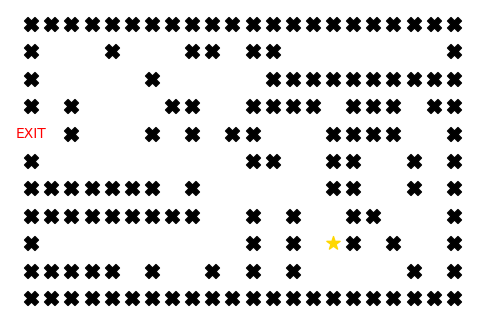

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)


In [20]:
visualize_maze(matrix,bonus_points,start,end)

# Using basic matrix 

### try to DFS -- Status: Complete

33


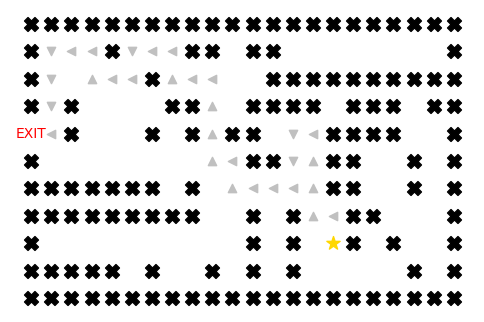

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)


In [21]:
def dfs_search(matrix, start, end):    
    row = len(matrix)
    col = len(matrix[0])

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    stack = []
    stack.append((x,y))
    
    dfs = {}
    count = 1
    while end not in stack:

        #print()
        #print(f'New while: {count}')
        count +=1
        #print(f'Stack: {stack}')
        #print(f'path: {path}')
        s = stack[-1]
        if s not in path:
            #print('Append path')
            path.append(s)
        #print(f'path: {path}')
        #print(s)
        for i in range(4) :
            # using the direction array
            a = s[0] + Dir[i][0]
            b = s[1] + Dir[i][1]

            # not blocked and valid
            if(a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) not in path):
                stack.append((a, b))
                dfs[(a,b)] = s
                break
            if(i == 3 ):
                for j in range(4):
                    a1 = s[0] + Dir[j][0] 
                    b1 = s[1] + Dir[j][1]
                    #print((a1,b1))
                    if (a1,b1) in stack:
                        #print(f'Stack: {stack}')
                        #print(f'Pop {(a1,b1)}')
                        stack.pop()
                        break
    #             print('Pop')
    #             stack.pop()
    path.append(end)
    p = {}
    cell = end
    while cell != start:
        p[dfs[cell]] = cell 
        cell = dfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    print(len(path))
    return finalPath
visualize_maze(matrix,bonus_points,start,end, dfs_search(matrix, start, end))

### Try to BFS -- Status: Complete
- Tham khảo: https://www.youtube.com/watch?v=D14YK-0MtcQ -> In đường đi

80


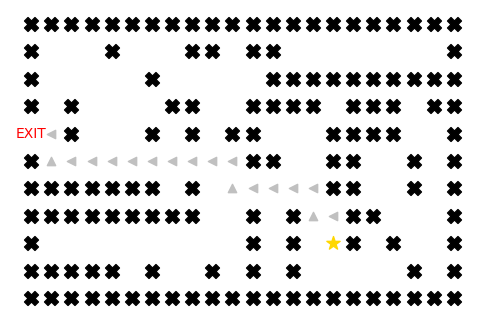

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)


In [22]:
from collections import deque
def bfs_search(matrix, start, end):
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]
    
    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    #path = []
    # Mark the source cell as visited
    visited[x][y] = True
    # Tao dictionary luu vi tri diem cha va diem con
    bfs = {}
    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        curr = q.popleft() # Dequeue the front cell
        #path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    
        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                visited[a][b] = True
                q.append((a, b))
                bfs[(a,b)] = curr
    print(len(bfs))
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    return finalPath
    
visualize_maze(matrix,'',start,end, bfs_search(matrix, start, end))

## Code tham khảo BFS

### Try to Greedy Best First Search - Status: Complete(using shorted distance)

10


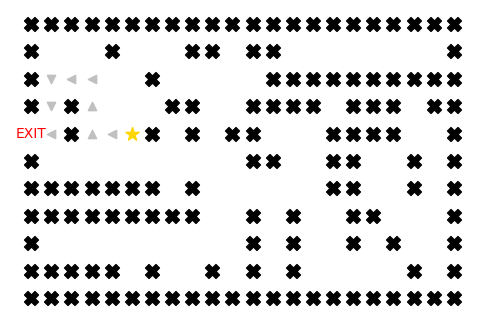

Starting point (x, y) = (4, 5)
Ending point (x, y) = (4, 0)


In [23]:
def GBFS_search(matrix, start, end): 
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()
    bfs = {}
    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                store_dist[(a, b)] = dist
                bfs[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                                store_dist[(a, b)] = dist
    #                             bfs[(a, b)] = point
                                break
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    break
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    print(len(path))
    return finalPath
    return path
visualize_maze(matrix,bonus_points,(4,5),end, GBFS_search(matrix, (4,5), end))

### Try to A* - Status: Complete

In [180]:
def Astar_search(matrix, start, end): 
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]
    
    bfs = {}
    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell
    store_dist = {}
    # Do a BFS starting from source cell
    while q:
        
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                dist_end = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                dist_start = math.sqrt((a-start[0])**2 + (b-start[1])**2)
                store_dist[(a, b)] = (dist_end + dist_start,dist_end, dist_start)
                bfs[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                dist_end = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                                dist_start = math.sqrt((a-start[0])**2 + (b-start[1])**2)
                                store_dist[(a, b)] = (dist_end + dist_start,dist_end, dist_start)
                                break
                store_dist = dict(sorted(store_dist.items(), key=lambda item: (item[1][0], item[1][1])))
                
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    store_dist.pop(key)
                    break
    
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    print(len(path))
    return p
# visualize_maze(matrix,bonus_points,(4,5),end, Astar_search(matrix, (4,5), end))

# Using bonus point matrix

In [25]:
with open('maze_map(bonus).txt', 'w') as outfile:
    outfile.write('3\n')
    outfile.write('3 6 -3\n')
    outfile.write('5 14 -1\n')
    outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        x\n')
    outfile.write('x     x     xxxxxxxxxx\n')
    outfile.write('x x   +xx  xxxx xxx xx\n')
    outfile.write('  x   x x xx   xxxx  x\n')
    outfile.write('x       S  xx +xx  x x\n')
    outfile.write('xxxxxxx x      xx  x x\n')
    outfile.write('xxxxxxxxx  x x  xx   x\n')
    outfile.write('x          x x  x x  x\n')
    outfile.write('xxxxx x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

In [26]:
bonus_points, matrix = read_file('maze_map(bonus).txt')

In [27]:
print(f'The height of the matrix: {len(matrix)}')
print(f'The width of the matrix: {len(matrix[0])}')

The height of the matrix: 11
The width of the matrix: 22


In [28]:
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i][j]=='S':
            start=(i,j)

        elif matrix[i][j]==' ':
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        else:
            pass

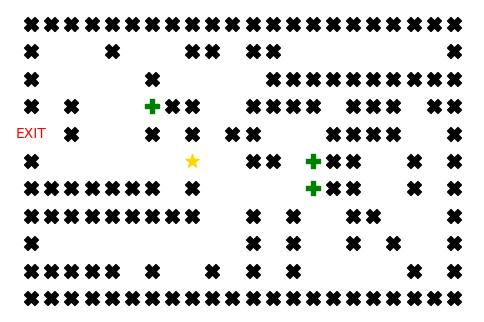

Starting point (x, y) = (5, 8)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [29]:
visualize_maze(matrix, bonus_points, start, end)

In [30]:
row = len(matrix)
col = len(matrix[0])
def init_weights(matrix):
    weights = [[1 for i in range(col)]for j in range(row)]
    for k in bonus_points:
        weights[k[0]][k[1]] = k[2]
    return weights

In [31]:
weights = init_weights(matrix)
start

(5, 8)

### Try to DFS - Status:
Ưu tiên chọn đường đi có trọng số nhỏ nhất

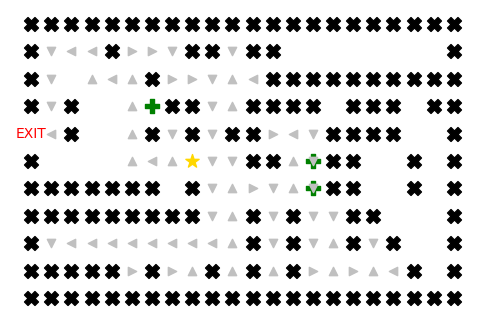

Starting point (x, y) = (5, 8)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [32]:
row = len(matrix)
col = len(matrix[0])

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
path = []
stack = []
stack.append((x,y))

count = 1
while end not in stack:
    
    store_dist = {}
    #print()
    #print(f'New while: {count}')
    count +=1
    #print(f'Stack: {stack}')
    #print(f'path: {path}')
    s = stack[-1]
    if s not in path:
        #print('Append path')
        path.append(s)
    #print(f'path: {path}')
    #print(s)
    for i in range(4) :
        # using the direction array
        a = s[0] + Dir[i][0]
        b = s[1] + Dir[i][1]
        
        # not blocked and valid
        if(a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) not in path):
            stack.append((a, b))
            break
#             store_dist[(a, b)] = weights[a][b]
#             dict(sorted(store_dist.items(), key=lambda item: item[1]))
#             if i == 3:
#                 for key, val in store_dist.items():
#                     stack.append(key)
#                     break
            
        if(i == 3 ):
            for j in range(4):
                a1 = s[0] + Dir[j][0] 
                b1 = s[1] + Dir[j][1]
                #print((a1,b1))
                if (a1,b1) in stack:
                    #print(f'Stack: {stack}')
                    #print(f'Pop {(a1,b1)}')
                    stack.pop()
                    break
#             print('Pop')
#             stack.pop()
path.append(end)
visualize_maze(matrix,bonus_points,start,end, path)

In [33]:
bonus_points

[(3, 6, -3), (5, 14, -1), (6, 14, -1)]

## Try to BFS - Status:
Ưu tiên đỉnh có trọng số nhỏ nhất


{(5, 7): 1, (5, 9): 1}
{(4, 7): 1, (5, 6): 1, (6, 7): 1}
{(4, 9): 1, (6, 9): 1, (5, 10): 1}
{}
{(5, 5): 1}
{}
{(3, 9): 1}
{(7, 9): 1, (6, 10): 1}
{}
{(4, 5): 1, (5, 4): 1}
{(2, 9): 1, (3, 10): 1}
{(8, 9): 1, (7, 10): 1}
{(6, 11): 1}
{(3, 5): 1, (4, 4): 1}
{(5, 3): 1}
{(2, 8): 1, (2, 10): 1}
{}
{(8, 8): 1, (8, 10): 1}
{}
{(6, 12): 1}
{(2, 5): 1, (3, 4): 1, (3, 6): -3}
{(4, 3): 1}
{(5, 2): 1}
{(2, 7): 1}
{(1, 10): 1, (2, 11): 1}
{(8, 7): 1, (9, 8): 1}
{(9, 10): 1}
{(7, 12): 1, (6, 13): 1}
{(1, 5): 1, (2, 4): 1}
{(3, 3): 1}
{}
{}
{(5, 1): 1}
{(1, 7): 1}
{}
{}
{(8, 6): 1, (9, 7): 1}
{}
{}
{(8, 12): 1}
{(5, 13): 1, (6, 14): -1}
{(1, 6): 1}
{(2, 3): 1}
{}
{(4, 1): 1}
{}
{(8, 5): 1}
{}
{(9, 12): 1}
{(4, 13): 1, (5, 14): -1}
{(7, 14): 1}
{}
{(1, 3): 1, (2, 2): 1}
{(3, 1): 1, (4, 0): 1}
{(8, 4): 1, (9, 5): 1}
{}
{(4, 12): 1, (4, 14): 1}
{}
{(8, 14): 1, (7, 15): 1}
{(1, 2): 1}
{(2, 1): 1}
{}
[(5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (4, 1), (4, 0)]


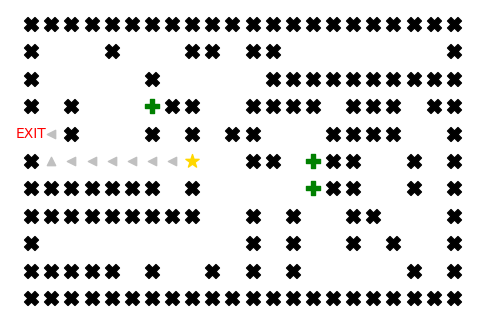

Starting point (x, y) = (5, 8)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [34]:
from collections import deque

row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
#path = []
# Mark the source cell as visited
visited[x][y] = True
# Tao dictionary luu vi tri diem cha va diem con
bfs = {}
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell

# Do a BFS starting from source cell
while q:
    store_dist = {}
    curr = q.popleft() # Dequeue the front cell
    #path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            visited[a][b] = True
            store_dist[(a, b)] = weights[a][b]
#             q.append((a, b))
            bfs[(a,b)] = curr
        if i == 3:
            print(store_dist)
            dict(sorted(store_dist.items(), key=lambda item: item[1]))
            for key, val in store_dist.items():
                q.append(key)
            
        
p = {}
cell = end
while cell != start:
    p[bfs[cell]] = cell 
    cell = bfs[cell]
final = list(p.values())
final.append(start)
finalPath = final[::-1]
#print(bfs)
#print(p)
#print(finalPath)
print(finalPath)
visualize_maze(matrix,bonus_points,start,end, finalPath)

## Try to GBFS
Ưu tiên trọng số

{(5, 7): 8.071067811865476, (5, 9): 10.055385138137417}
{(5, 6): 7.082762530298219, (4, 7): 8.0, (6, 7): 8.280109889280517}
{(5, 5): 6.0990195135927845}
{(5, 4): 5.123105625617661, (4, 5): 6.0}
{(5, 3): 4.16227766016838, (4, 4): 5.0}
{(5, 2): 3.23606797749979, (4, 3): 4.0}
{(5, 1): 2.414213562373095}
{(4, 1): 2.0}
{(4, 0): 1.0, (3, 1): 2.414213562373095}


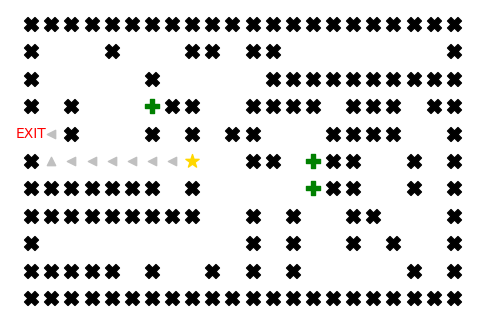

Starting point (x, y) = (5, 8)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [35]:
row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
bfs = {}
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell
     
# Do a BFS starting from source cell
while q:
    store_dist = {}
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
        
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
            store_dist[(a, b)] = weights[a][b] + dist
            bfs[(a, b)] = curr
            #select point based on distance array
        if i == 3:
            if store_dist == {}:
                #if it doesn't quit traverse path to find a new way :v
                for point in reversed(path):
                    for i in range(4):
                        a = point[0] + Dir[i][0]
                        b = point[1] + Dir[i][1]
                        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                            dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                            store_dist[(a, b)] = weights[a][b] + dist
#                             bfs[(a, b)] = point
#                             break
                
            store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
            print(store_dist)
            for key, val in store_dist.items():
                visited[key[0]][key[1]] = True
                q.append(key)
                break
p = {}
cell = end
while cell != start:
    p[bfs[cell]] = cell 
    cell = bfs[cell]
final = list(p.values())
final.append(start)
finalPath = final[::-1]
visualize_maze(matrix,bonus_points,start,end, path)

## Sửa code GBFS có điểm thưởng : 

(5, 8)
{(5, 7): 8.071067811865476, (5, 9): 10.055385138137417}

(5, 7)
{(5, 6): 7.082762530298219, (4, 7): 8.0, (6, 7): 8.280109889280517}

(5, 6)
{(5, 5): 6.0990195135927845}

(5, 5)
{(5, 4): 5.123105625617661, (4, 5): 6.0}

(5, 4)
{(5, 3): 4.16227766016838, (4, 4): 5.0}

(5, 3)
{(5, 2): 3.23606797749979, (4, 3): 4.0}

(5, 2)
{(5, 1): 2.414213562373095}

(5, 1)
{(4, 1): 2.0}

(4, 1)
{(4, 0): 1.0, (3, 1): 2.414213562373095}



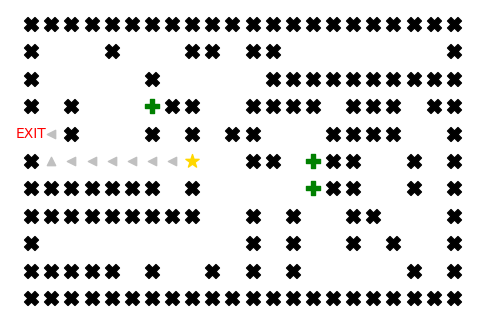

Starting point (x, y) = (5, 8)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [36]:
def GBFS_bonus(matrix, start, end):
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]

    # start = (5, 6)
    x = start[0]
    y = start[1]


    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    bfs = {}
    bfs_length = {}
    path = []
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break
        print(curr)
        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                store_dist[(a, b)] = weights[a][b] + dist
                bfs[(a, b)] = curr
                #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(bfs.values()):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                                store_dist[(a, b)] = weights[a][b] + dist

                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                print(store_dist)
                if len(store_dist.values()) > 1 and len(set(store_dist.values())) == 1:
                    for key, val in store_dist.items():
                        bfs_length[key] = len(bfs_search(matrix,key,end))
                    bfs_length = dict(sorted(bfs_length.items(), key=lambda item: item[1]))
                    for k,length in bfs_length.items():
                        visited[k[0]][k[1]] = True
                        q.append(k)
                        break
                else:
                    for key, val in store_dist.items():
                        visited[key[0]][key[1]] = True
                        q.append(key)
                        break
        print()
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    return finalPath
visualize_maze(matrix,bonus_points,start,end, GBFS_bonus(matrix, start, end))

## Try to A* - Status: 

### Sửa đổi trọng số

{(5, 7): 2, (5, 9): 2}
[(5, 8)]
{(4, 7): 2, (5, 6): 2, (6, 7): 2}
[(5, 8), (5, 7)]
{}
[(5, 8), (5, 7), (4, 7)]
{(5, 5): 2}
[(5, 8), (5, 7), (4, 7), (5, 6)]
{(4, 5): 2, (5, 4): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5)]
{(3, 5): 2, (4, 4): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5)]
{(2, 5): 2, (3, 4): 2, (3, 6): -2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5)]
{}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6)]
{(1, 5): 2, (2, 4): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5)]
{(1, 6): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5), (1, 5)]
{(1, 7): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5), (1, 5), (1, 6)]
{(2, 7): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5), (1, 5), (1, 6), (1, 7)]
{(2, 8): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7)]
{(2, 9): 2}
[(5, 8), (5, 7), (4,

[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (9, 5), (9, 7), (9, 8), (8, 10), (7, 10), (6, 10), (5, 10), (6, 11), (6, 12), (7, 12), (8, 12), (9, 12), (6, 13), (6, 14), (5, 14), (4, 14), (4, 13), (4, 12), (5, 13), (7, 14), (8, 14), (9, 14)]
{(8, 15): 2, (9, 16): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (9, 5), (9, 7), (9, 8), (8, 10), (7, 10), (6, 10), (5, 10), (6, 11), (6, 12), (7, 12), (8, 12), (9, 12), (6, 13), (6, 14), (5, 14), (4, 14), (4, 13), (4, 12), (5, 13), (7, 14), (8, 14), (9, 14), (9, 15)]
{(7, 15): 2}
[(5, 8), (5, 7), (4, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 6), (2, 5), (1, 5), (1, 6), (1, 7), 

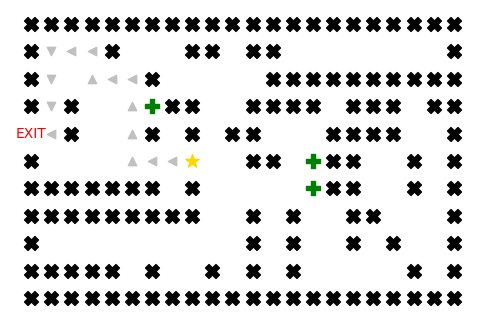

Starting point (x, y) = (5, 8)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [37]:
row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
bfs = {}
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell
     
# Do a BFS starting from source cell
while q:
    store_dist = {}
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
        
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            store_dist[(a, b)] = weights[a][b] + weights[curr[0]][curr[1]]
            bfs[(a, b)] = curr
            #select point based on distance array
        if i == 3:
            print(store_dist)
            if store_dist == {}:
                #if it doesn't quit traverse path to find a new way :v
                for point in reversed(path):
                    for i in range(4):
                        a = point[0] + Dir[i][0]
                        b = point[1] + Dir[i][1]
                        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                            store_dist[(a, b)] = weights[a][b] + weights[curr[0]][curr[1]]
                            bfs[(a, b)] = point
                            break
                
            store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
            for key, val in store_dist.items():
                visited[key[0]][key[1]] = True
                q.append(key)
                break
    print(path)
p = {}
cell = end
while cell != start:
    p[bfs[cell]] = cell 
    cell = bfs[cell]
final = list(p.values())
final.append(start)
finalPath = final[::-1]
visualize_maze(matrix,bonus_points,start,end, finalPath)

## Create file 5 for basic matrix

In [38]:
def get_infor_from_matrix(matrix='maze_map.txt'):
    bonus_points, matrix = read_file('maze_map.txt')
    start = 0
    end = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]=='S':
                start=(i,j)

            elif matrix[i][j]==' ':
                if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                    end=(i,j)

            else:
                pass
    return [bonus_points, matrix, start, end]

In [39]:
#map 1
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        xx  xxx     xx\n')
    outfile.write('x     x     xxxxxx    xxx        xx\n')
    outfile.write('x x   +xx  xxxx xxx x           xxx\n')
    outfile.write('  x   x x xx   xxxx  xx x     xxxxx\n')
    outfile.write('x          xx +xx  x x xxxxxxxxxxxx\n')
    outfile.write('xxxxxxx x      xx  x xxxxx      xxx\n')
    outfile.write('xxxxxxxxx  x x  xx   xxx          x\n')
    outfile.write('x          x x  x x  xxxxxxxxxxxxxx\n')
    outfile.write('xxxxx x  x x x     x xxxxxxxxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxx               xxxx\n')
    outfile.write('xx     xxxx            xxxxx     xx\n')
    outfile.write('xxxx      xxxxxxxxxxxxxxxxx      xx\n')
    outfile.write('xS                     xxx     xxxx\n')
    outfile.write('xxxxxxx            xx      xxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

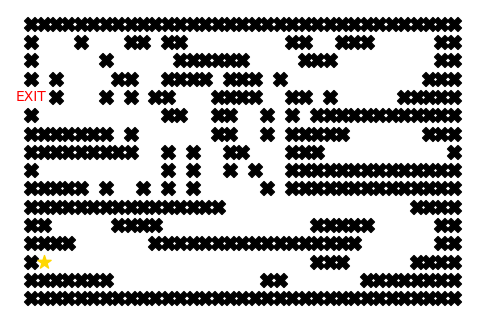

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [40]:
matrix_1 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_1[1]
start = matrix_1[2]
end = matrix_1[3]
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3])

In [41]:
print(f'The height of the matrix: {len(matrix_1[1])}')
print(f'The width of the matrix: {len(matrix_1[1][0])}')

The height of the matrix: 16
The width of the matrix: 35


162
99


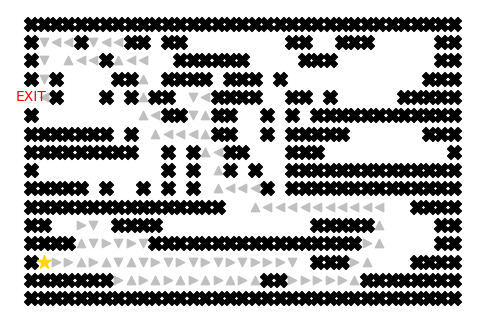

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [42]:
# using dfs 
path = dfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

231
67


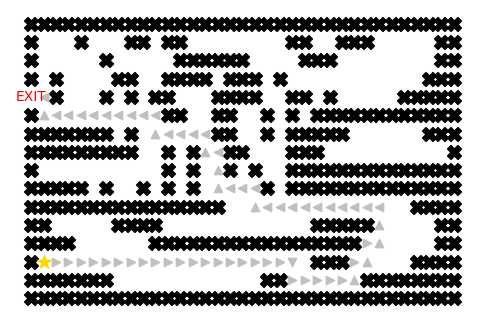

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [43]:
# using bfs
path = bfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

91
83


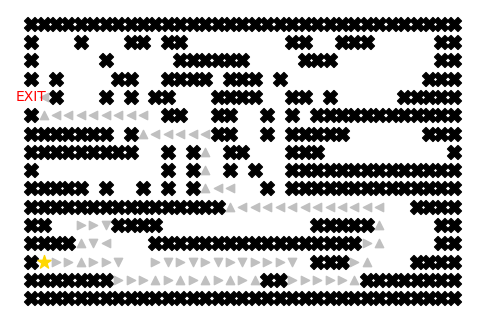

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [44]:
# using GBFS
path = GBFS_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

104
71


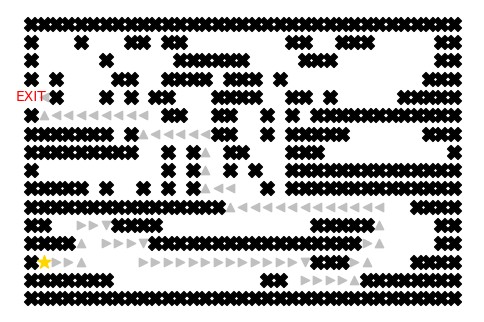

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [45]:
# using A*
path = Astar_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

In [46]:
#map 2
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx           x\n')
    outfile.write('x     x     xxx   xxxx\n')
    outfile.write('x x   xxx  xxxx x x xx\n')
    outfile.write('x x   xxxxxxxxxxx    x\n')
    outfile.write('x          xx xxx  x x\n')
    outfile.write('xx xx x x      xx  x x\n')
    outfile.write('x       xxxxxxxxxxx   \n')
    outfile.write('x  xx     Sx x xx x  x\n')
    outfile.write('xx  x x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

refactor function get information from matrix

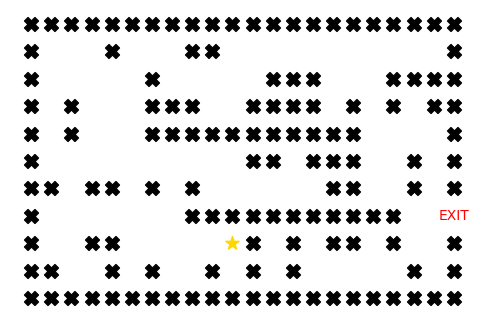

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [47]:
matrix_2 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_2[1]
start = matrix_2[2]
end = matrix_2[3]
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3])

52
45


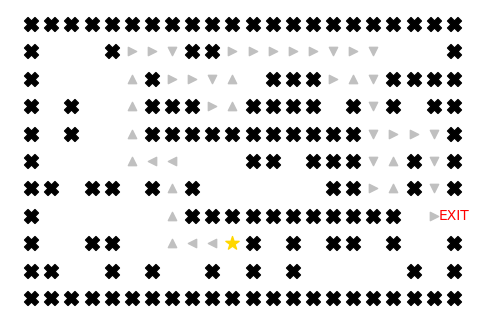

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [48]:
# using dfs 
path = dfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

99
37


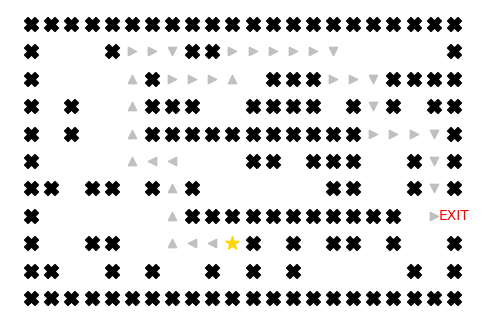

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [49]:
# using bfs
path = bfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

60
41


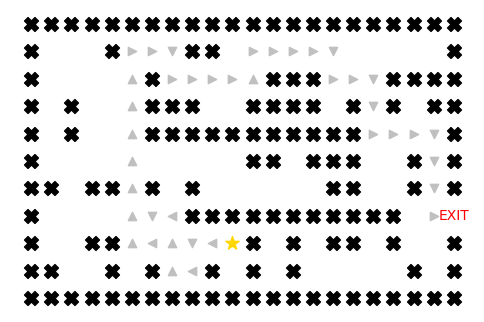

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [50]:
# using GBFS
path = GBFS_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

68
43


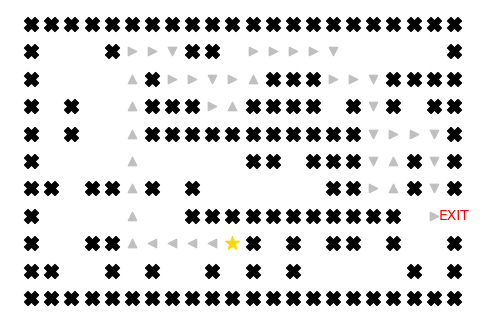

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [51]:
# using A*
path = Astar_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

In [52]:
#map 3
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx          Sx\n')
    outfile.write('x   x x  x  xxx   xxxx\n')
    outfile.write('x   x     x          x\n')
    outfile.write('x   x    x           x\n')
    outfile.write('x   x      xx xxx  x x\n')
    outfile.write('xx xxxxxx      xx  x x\n')
    outfile.write('   x    xx   xxx  x  x\n')
    outfile.write('x       x    xxx     x\n')
    outfile.write('xx  x x    x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

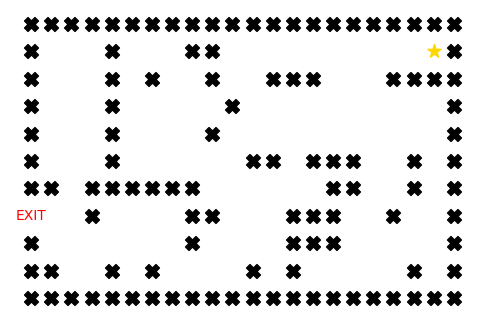

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [53]:
matrix_3 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_3[1]
start = matrix_3[2]
end = matrix_3[3]
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3])

72
37


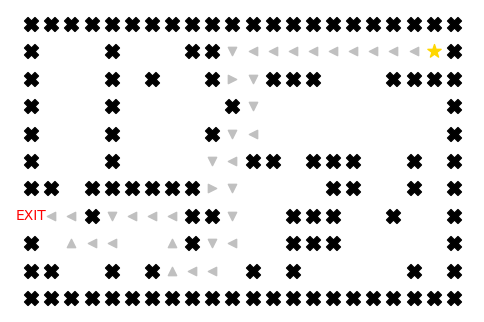

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [54]:
# using dfs 
path = dfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

119


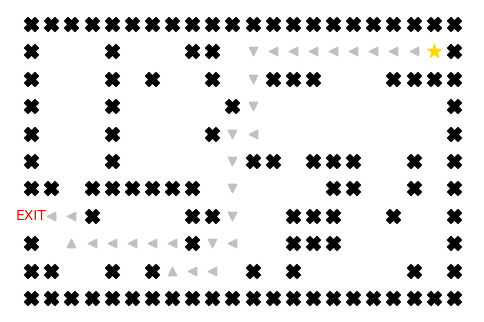

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [55]:
# using bfs
path = bfs_search(matrix, start, end)
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

53
35


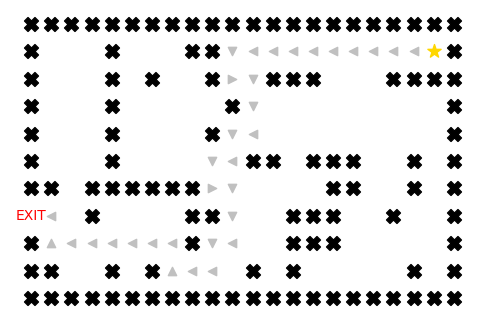

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [56]:
# using GBFS
path = GBFS_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

88
35


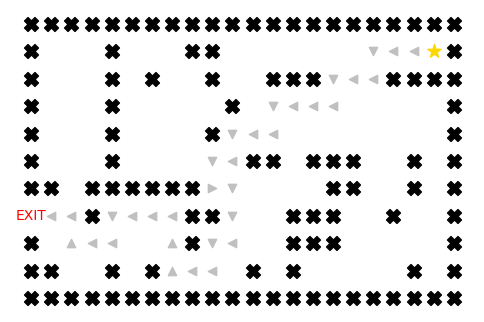

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [57]:
# using A*
path = Astar_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

In [58]:
#map 4
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x x Sxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   x xx  x   x   x  x\n')
    outfile.write('x    x   x   xxx     x\n')
    outfile.write('x     x x  xx    xxxxx\n')
    outfile.write('x  x x x  x xxxx     x\n')
    outfile.write('x   x     x          x\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx     x\n')
    outfile.write('xxxxxxxxxx xxxxxxxxxxx')

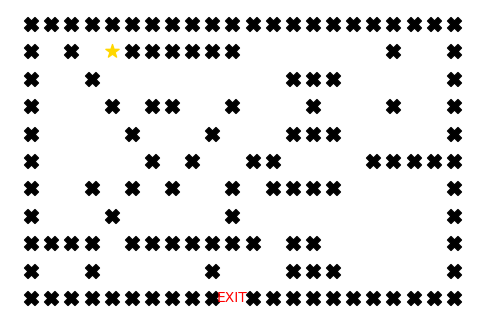

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [59]:
matrix_4 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_4[1]
start = matrix_4[2]
end = matrix_4[3]
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3])

61
32


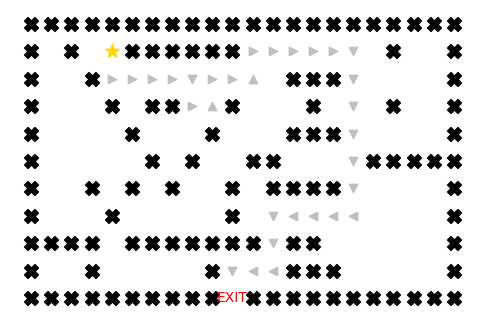

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [60]:
# using dfs 
path = dfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

93


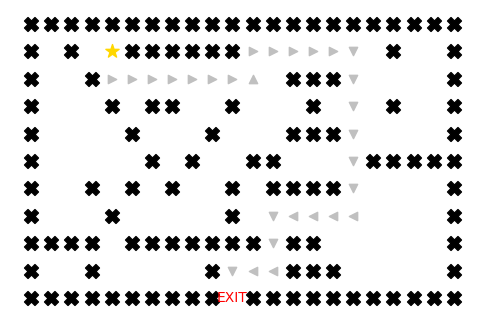

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [61]:
# using bfs
path = bfs_search(matrix, start, end)
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

57
36


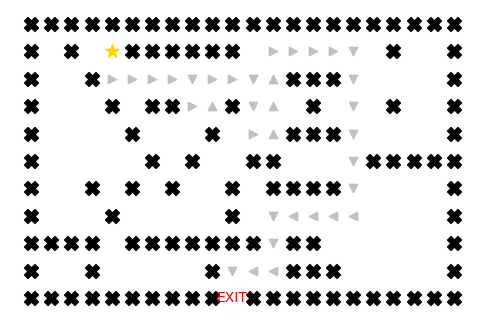

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [62]:
# using GBFS
path = GBFS_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

61
36


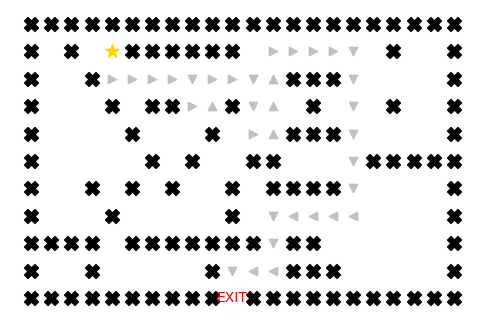

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [63]:
# using A*
path = Astar_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

In [64]:
#map 5
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xSx xxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   xx x  x   x   x  x\n')
    outfile.write('x        xx  xxx     x\n')
    outfile.write('x     xxx  xx    xxxxx\n')
    outfile.write('x  xxxxx  x xxxx     x\n')
    outfile.write('x   x     x      xxxxx\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx      \n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

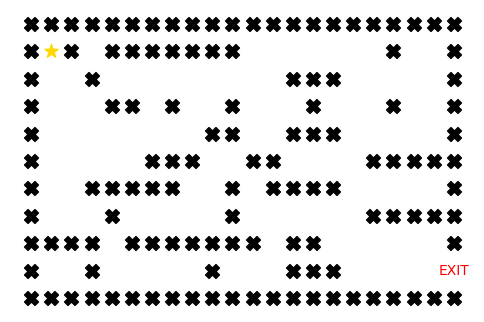

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [65]:
matrix_5 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_5[1]
start = matrix_5[2]
end = matrix_5[3]
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3])

78
53


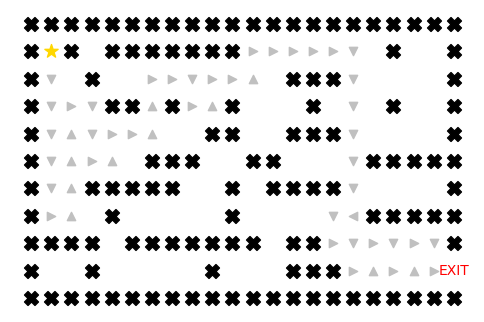

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [66]:
# using dfs 
path = dfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

96


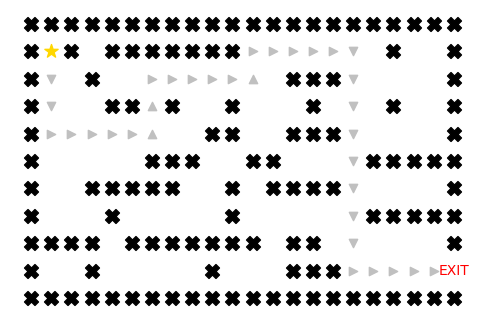

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [67]:
# using bfs
path = bfs_search(matrix, start, end)
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

44
35


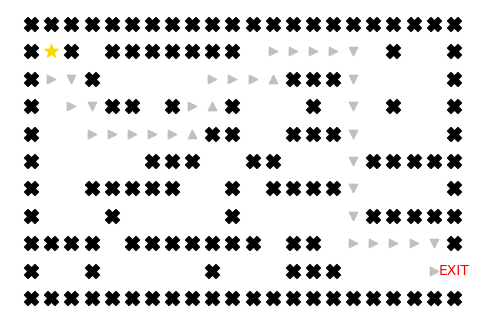

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [68]:
# using GBFS
path = GBFS_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

59
35


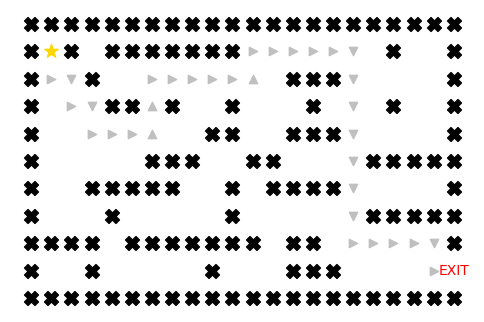

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [69]:
# using A*
path = Astar_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

### map bonus_point

In [70]:
#map 5 -- 2 bonus
with open('maze_map.txt', 'w') as outfile:
    outfile.write('2\n')
    outfile.write('3 6 -3\n')
    outfile.write('5 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xSx xxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   xx x  x   x   x  x\n')
    outfile.write('x        xx  xxx     x\n')
    outfile.write('x     xxx  xx    xxxxx\n')
    outfile.write('x  xxxxx  x xxxx     x\n')
    outfile.write('x   x     x      xxxxx\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx      \n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

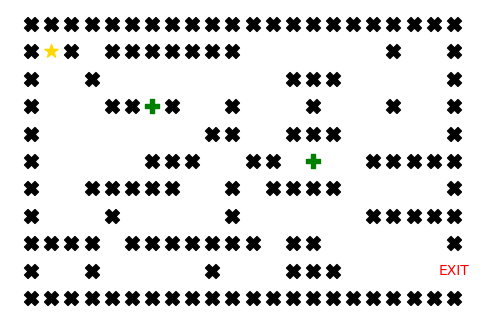

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1


In [71]:
matrix_5b = get_infor_from_matrix('maze_map.txt')
matrix = matrix_5b[1]
start = matrix_5b[2]
end = matrix_5b[3]
visualize_maze(matrix_5b[1],matrix_5b[0],matrix_5b[2],matrix_5b[3])

(1, 1)
{(2, 1): 22.18962010041709}

(2, 1)
{(2, 2): 21.248456731316587, (3, 1): 21.8806130178211}

(2, 2)
{(3, 2): 20.924858845171276}

(3, 2)
{(3, 3): 19.973665961010276, (4, 2): 20.6468827043885, (3, 1): 21.8806130178211}

(3, 3)
{(4, 3): 19.681541692269406}

(4, 3)
{(4, 4): 18.72004514666935, (5, 3): 19.439088914585774, (4, 2): 20.6468827043885}

(4, 4)
{(4, 5): 17.76305461424021, (5, 4): 18.46424919657298}

(4, 5)
{(4, 6): 16.811388300841898, (5, 5): 17.492422502470642}

(4, 6)
{(3, 6): 13.15549442140351, (4, 7): 15.866068747318506}

(3, 6)
{(2, 6): 17.55294535724685}

(2, 6)
{(2, 7): 16.65247584249853, (2, 5): 18.46424919657298}

(2, 7)
{(2, 8): 15.7648230602334}

(2, 8)
{(2, 9): 14.892443989449804, (3, 8): 15.317821063276353}

(2, 9)
{(2, 10): 14.038404810405298, (3, 9): 14.416407864998739}

(2, 10)
{(2, 11): 13.206555615733702}

(2, 11)
{(2, 12): 12.40175425099138, (3, 11): 12.661903789690601, (1, 11): 13.806248474865697}

(2, 12)
{(3, 12): 11.816653826391969, (1, 12): 13.041594

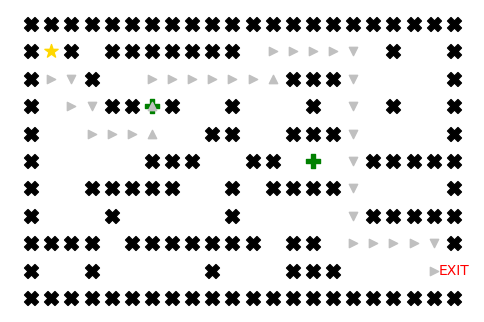

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1


In [72]:
# using GBFS
path = GBFS_bonus(matrix, start, end)
visualize_maze(matrix_5b[1],matrix_5b[0],matrix_5b[2],matrix_5b[3], path)

In [158]:
#map 5 -- 5 bonus
with open('maze_map.txt', 'w') as outfile:
    outfile.write('5\n')
    outfile.write('3 6 -3\n')
    outfile.write('4 17 -1\n')
    outfile.write('7 4 -1\n')
    outfile.write('9 11 -1\n')
    outfile.write('7 15 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xSx xxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   xx x  x   x   x  x\n')
    outfile.write('x        xx  xxx     x\n')
    outfile.write('x     xxx  xx    xxxxx\n')
    outfile.write('x  xxxxx  x xxxx     x\n')
    outfile.write('x         x      xxxxx\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx      \n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

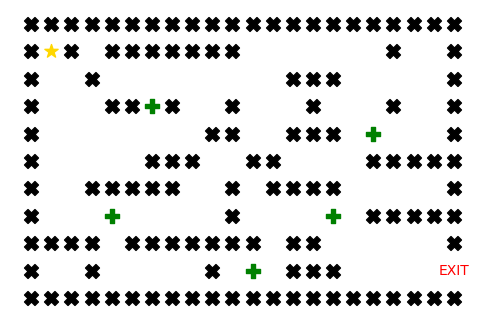

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (4, 17) with point -1
Bonus point at position (x, y) = (7, 4) with point -1
Bonus point at position (x, y) = (9, 11) with point -1
Bonus point at position (x, y) = (7, 15) with point -1


In [164]:
matrix_5bc = get_infor_from_matrix('maze_map.txt')
matrix = matrix_5bc[1]
start = matrix_5bc[2]
end = matrix_5bc[3]
visualize_maze(matrix_5bc[1],matrix_5bc[0],matrix_5bc[2],matrix_5bc[3])

(1, 1)
{(2, 1): 22.18962010041709}

(2, 1)
{(2, 2): 21.248456731316587, (3, 1): 21.8806130178211}

(2, 2)
{(3, 2): 20.924858845171276}

(3, 2)
{(3, 3): 19.973665961010276, (4, 2): 20.6468827043885, (3, 1): 21.8806130178211}

(3, 3)
{(4, 3): 19.681541692269406}

(4, 3)
{(4, 4): 18.72004514666935, (5, 3): 19.439088914585774, (4, 2): 20.6468827043885}

(4, 4)
{(4, 5): 17.76305461424021, (5, 4): 18.46424919657298}

(4, 5)
{(4, 6): 16.811388300841898, (5, 5): 17.492422502470642}

(4, 6)
{(3, 6): 13.15549442140351, (4, 7): 15.866068747318506}

(3, 6)
{(2, 6): 17.55294535724685}

(2, 6)
{(2, 7): 16.65247584249853, (2, 5): 18.46424919657298}

(2, 7)
{(2, 8): 15.7648230602334}

(2, 8)
{(2, 9): 14.892443989449804, (3, 8): 15.317821063276353}

(2, 9)
{(2, 10): 14.038404810405298, (3, 9): 14.416407864998739}

(2, 10)
{(2, 11): 13.206555615733702}

(2, 11)
{(2, 12): 12.40175425099138, (3, 11): 12.661903789690601, (1, 11): 13.806248474865697}

(2, 12)
{(3, 12): 11.816653826391969, (1, 12): 13.041594

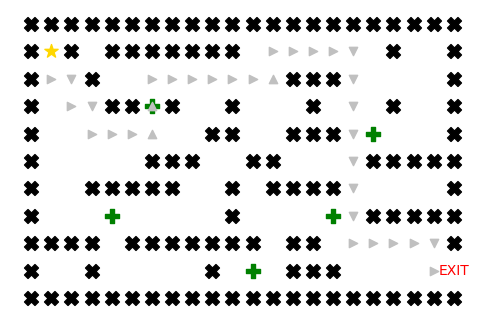

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (4, 17) with point -1
Bonus point at position (x, y) = (7, 4) with point -1
Bonus point at position (x, y) = (9, 11) with point -1
Bonus point at position (x, y) = (7, 15) with point -1


In [160]:
# using GBFS
path = GBFS_bonus(matrix, start, end)
visualize_maze(matrix_5bc[1],matrix_5bc[0],matrix_5bc[2],matrix_5bc[3], path)

## Use greedy

In [161]:
bonus_points = {}
for bonus in matrix_5bc[0]:
    bonus_points[(bonus[0], bonus[1])] = bonus[2]
bonus_points

{(3, 6): -3, (4, 17): -1, (7, 4): -1, (9, 11): -1, (7, 15): -1}

In [162]:
bonus_points = dict(sorted(bonus_points.items(), key=lambda item: (item[1])))
bonus_list = list(bonus_points.keys())
bonus_list

[(3, 6), (4, 17), (7, 4), (9, 11), (7, 15)]

In [213]:
i = 0
e = bonus_list[0]
s = start
store_all_path = {}

# store_all_path = {}
while i < len(bonus_list):
    if bonus_list[i] in list(store_all_path.keys()):
        i += 1
        continue
    e = bonus_list[i]
    if i != 0:
        s = bonus_list[i-1]
    path = Astar_search(matrix, s, e)
#     visualize_maze(matrix_5bc[1],matrix_5bc[0],matrix_5bc[2],matrix_5bc[3], path)
    store_all_path.update(path)
    i += 1

store_all_path.update(Astar_search(matrix, bonus_list[-1], end))
print(store_all_path)
store_all_path.update(path)
# store_all_path

10
28
70
81
9
{(4, 6): (3, 6), (4, 5): (4, 6), (4, 4): (4, 5), (4, 3): (4, 4), (3, 3): (4, 3), (3, 2): (3, 3), (2, 2): (3, 2), (2, 1): (2, 2), (1, 1): (2, 1), (4, 16): (5, 16), (3, 16): (4, 16), (2, 16): (3, 16), (1, 16): (2, 16), (1, 15): (1, 16), (1, 14): (1, 15), (1, 13): (1, 14), (1, 12): (1, 13), (1, 11): (1, 12), (2, 11): (1, 11), (2, 10): (2, 11), (2, 9): (2, 10), (3, 9): (3, 8), (3, 8): (4, 8), (4, 8): (4, 7), (4, 7): (4, 6), (3, 6): (2, 6), (7, 3): (7, 2), (7, 2): (6, 2), (6, 2): (5, 2), (5, 2): (5, 3), (5, 3): (5, 4), (5, 4): (5, 5), (5, 5): (4, 5), (3, 11): (2, 11), (4, 11): (3, 11), (4, 12): (4, 11), (3, 12): (4, 12), (2, 12): (3, 12), (4, 17): (4, 16), (9, 12): (9, 11), (8, 12): (9, 12), (7, 12): (8, 12), (7, 13): (7, 12), (7, 14): (7, 13), (7, 15): (7, 16), (7, 16): (8, 16), (6, 16): (7, 16), (5, 16): (6, 16), (2, 8): (2, 9), (2, 7): (2, 8), (2, 6): (2, 7), (7, 4): (7, 3), (9, 20): (9, 21), (9, 19): (9, 20), (8, 19): (9, 19), (8, 18): (8, 19), (8, 17): (8, 18), (8, 16): (

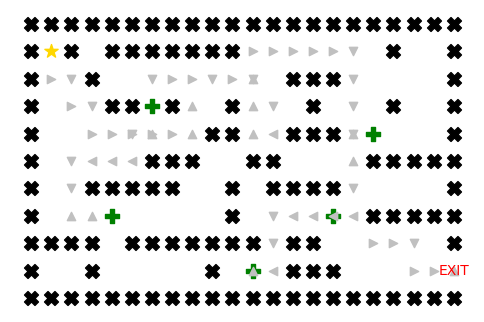

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (4, 17) with point -1
Bonus point at position (x, y) = (7, 4) with point -1
Bonus point at position (x, y) = (9, 11) with point -1
Bonus point at position (x, y) = (7, 15) with point -1


In [215]:
# p = {}
# cell = end
# while cell != start:
#     p[store_all_path[cell]] = cell 
#     cell = store_all_path[cell]
# final = list(p.values())
# final.append(start)
# finalPath = final[::-1]
# print(len(path))
final = list(store_all_path.values())
final.append(start)
finalPath = final[::-1]
visualize_maze(matrix_5bc[1],matrix_5bc[0],matrix_5bc[2],matrix_5bc[3], finalPath)